In [220]:
#system("git clone https://github.com/cstevenson-uva/creAI-gpt3.git")

In [224]:
#system("git status")

In [1]:
library(lme4)

Loading required package: Matrix



In [2]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



In [140]:
dat = read_csv("aut_semdis_input_w_dists.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  `Unnamed: 0.2` = col_double(),
  `Unnamed: 0.1` = col_double(),
  `Unnamed: 0` = col_double(),
  id = col_double(),
  item = col_character(),
  response = col_character(),
  response_id = col_double(),
  object = col_character(),
  respondent_id = col_character(),
  temperature = col_double(),
  eucl_item_resp = col_double(),
  eucl_objc_resp = col_double(),
  cos_dist_item_resp = col_double(),
  cos_dist_objc_resp = col_double(),
  semdis_prev = col_double()
)




In [141]:
options(repr.matrix.max.rows=12)
dat

X1,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp,semdis_prev
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1368,1368,1368,1368,1369,chair,conductor,20172822,fork,BP20160000,NA,9.479910,9.907753,0.8481695,0.9347329,2.00000000
1369,1369,1369,1369,1370,chair,catapult,20172823,fork,BP20160000,NA,8.275051,8.265690,0.8442494,0.8519543,0.01545234
1370,1370,1370,1370,1371,chair,keep elastic,20172824,fork,BP20160000,NA,9.093078,8.941148,0.8157409,0.7954242,0.12087907
1371,1371,1371,1371,1372,chair,bobbin,20172825,fork,BP20160000,NA,9.251673,9.003500,0.8707858,0.8320426,0.34906667
1372,1372,1372,1372,1373,chair,thumbtack substitute,20172826,fork,BP20160000,NA,10.181813,10.375311,0.8119733,0.8502036,0.13889532
1373,1373,1373,1373,1374,chair,dart,20172827,fork,BP20160000,NA,8.066122,8.237364,0.7583568,0.7995839,0.29148245
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
814,814,814,814,815,chair,soap dish,2022050311,tin can,cmpl-59ySPvIcRvSasC17RrZwg81HyHEQa,0.8,12.332045,10.987359,0.7623589,0.5753956,0.4734167
815,815,815,815,816,chair,pig,2022050312,tin can,cmpl-59ySPvIcRvSasC17RrZwg81HyHEQa,0.8,8.385424,7.588443,0.7975547,0.6683750,0.3413917


In [142]:
dat2 = dat %>% mutate(human = grepl("BP2016",respondent_id))
dat2

X1,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp,semdis_prev,human
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1368,1368,1368,1368,1369,chair,conductor,20172822,fork,BP20160000,NA,9.479910,9.907753,0.8481695,0.9347329,2.00000000,TRUE
1369,1369,1369,1369,1370,chair,catapult,20172823,fork,BP20160000,NA,8.275051,8.265690,0.8442494,0.8519543,0.01545234,TRUE
1370,1370,1370,1370,1371,chair,keep elastic,20172824,fork,BP20160000,NA,9.093078,8.941148,0.8157409,0.7954242,0.12087907,TRUE
1371,1371,1371,1371,1372,chair,bobbin,20172825,fork,BP20160000,NA,9.251673,9.003500,0.8707858,0.8320426,0.34906667,TRUE
1372,1372,1372,1372,1373,chair,thumbtack substitute,20172826,fork,BP20160000,NA,10.181813,10.375311,0.8119733,0.8502036,0.13889532,TRUE
1373,1373,1373,1373,1374,chair,dart,20172827,fork,BP20160000,NA,8.066122,8.237364,0.7583568,0.7995839,0.29148245,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
814,814,814,814,815,chair,soap dish,2022050311,tin can,cmpl-59ySPvIcRvSasC17RrZwg81HyHEQa,0.8,12.332045,10.987359,0.7623589,0.5753956,0.4734167,FALSE
815,815,815,815,816,chair,pig,2022050312,tin can,cmpl-59ySPvIcRvSasC17RrZwg81HyHEQa,0.8,8.385424,7.588443,0.7975547,0.6683750,0.3413917,FALSE


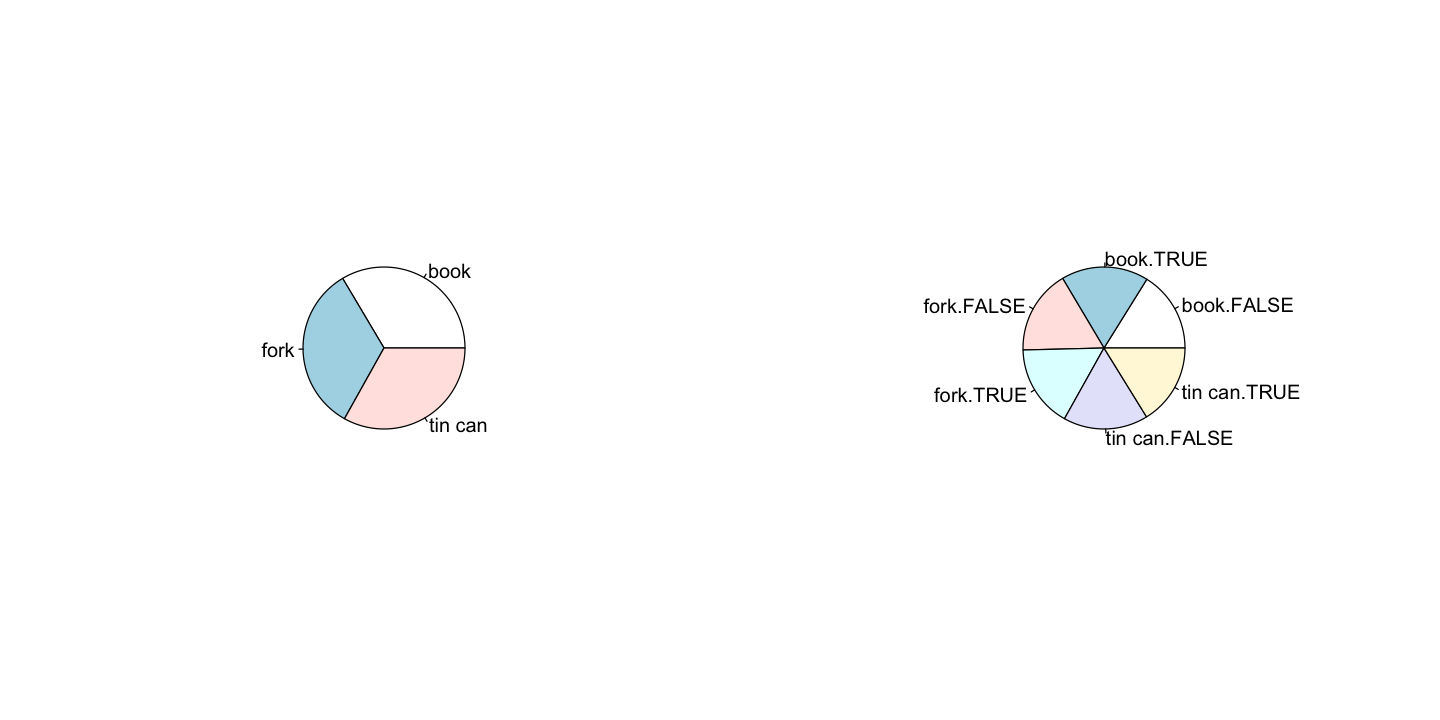

In [143]:
options(repr.plot.width=12, repr.plot.height=6,par=c(1,1,1,1))
layout(t(1:2))
{
    dat2 %>% count(object) %>% with(pie(n,labels = object))
    dat2 %>% count(object, human) %>% with(pie(n, labels = interaction(object, human)))
}

In [144]:
dat2 %>% count(respondent_id, object) %>% pivot_wider(respondent_id, object,values_from = n)

#dat2 %>% xtabs(~respondent_id + object, .)

respondent_id,fork,book,tin can
<chr>,<int>,<int>,<int>
BP20160000,9,NA,NA
BP20160001,4,4,4
BP20160002,NA,16,16
BP20160007,5,5,5
BP20160009,3,2,NA
BP20160011,6,6,5
⋮,⋮,⋮,⋮
cmpl-59ySBLShnZRbMIroCuk6r1jtoFSoV,NA,NA,4
cmpl-59ySFHYS4G8bMycEcyaQbOMs5cUh6,NA,NA,5


## Multilevel Analysis of object-response semantic distances

Each respondent generated multiple responses for pultiple objects, except for the GPT3 generated responses. Not every participant responded to all objects. We accommodate this with a multilevel model.

In [145]:
lmefit = lmer(cos_dist_objc_resp ~ human * object + (1|respondent_id), data = dat2)
car::S(lmefit)
car::Anova(lmefit)

Linear mixed model fit by REML 
Call: lmer(formula = cos_dist_objc_resp ~ human * object + (1 | respondent_id),
           data = dat2)

Estimates of Fixed Effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.73500    0.01733  42.404  < 2e-16 ***
humanTRUE                0.01490    0.02527   0.590    0.555    
objectfork              -0.18676    0.02448  -7.629 2.36e-14 ***
objecttin can           -0.14302    0.02458  -5.818 5.94e-09 ***
humanTRUE:objectfork     0.17275    0.02715   6.364 1.97e-10 ***
humanTRUE:objecttin can  0.13166    0.02716   4.847 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Estimates of Random Effects (Covariance Components):
 Groups        Name        Std.Dev.
 respondent_id (Intercept) 0.1055  
 Residual                  0.1337  

Number of obs: 1643, groups:  respondent_id, 186

  logLik       df      AIC      BIC 
  798.34        8 -1580.68 -1537.45 

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
human,34.63502,1,3.976867e-09
object,20.91418,2,2.874380e-05
human:object,44.31916,2,2.378025e-10


The Anova table (the last table) for this model indicates that

- There's a large significant effect of whether the response human generated or AI generated
- There are large significant differences between the mean semantic distances of the different objects
- The differences between human and AI generated responses vary (highly) significantly across objects.

The table of coefficients shows in which directions these effects go:

- Human generated responses tend to have higher semantic distances to the object than AI generated responses
- Compared to responses to 'fork', whether human or AI generated, are closer to the semantic meaning of 'fork' than
  responses to 'book' are to the semantic meaning of 'book' (z=-3.8, p < .0001). Responses to 'tin can' are even
  closer to the semantic meaning of tin can than responses to 'book' are to book (z=-11.5, p < .0001).
- However, human generated responses to 'fork' tend to lie further from the semantic meaning of 'fork' than
  AI generated responses (z = 4.9, p < .0001), and the same is true for responses to 'tin can' (z = 4.3, p < .0001).

## Check with conventional repeated measures ANOVA

The $z$-statistics and corresponding $p$ values are only approximate in the multilevel model. Just to check if the conclusions uphold in a more conventional repeated measures ANOVA, we perform this analysis here.

In [146]:
fit <- aov(cos_dist_objc_resp ~ object*human + Error(respondent_id), data = dat2)
car::S(fit)


Error: respondent_id
              Df Sum Sq Mean Sq F value   Pr(>F)    
object         2  5.026   2.513  28.658 1.57e-11 ***
human          1  4.314   4.314  49.196 4.52e-11 ***
object:human   2  0.626   0.313   3.569   0.0302 *  
Residuals    180 15.783   0.088                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
            Df Sum Sq Mean Sq F value Pr(>F)
object       2  0.031 0.01568   0.881  0.415
Residuals 1455 25.911 0.01781               

### Result

After controling for `respondent_id` (participant—human or otherwise),

- `object` levels have significantly different mean cosine distances between object and response vectors
- there's a significant difference between human response producers and artificial response producers
- there appears to be a significant interaction between the object to which the response was made 
  and whether the respondent was human or not

A visualization of the existing differences shows that, while the mean semantic distance scores difference between human and AI does not appear to be significant for `object` = "book", the same differences are quite substantial for `object` = "fork" and `object` = "tin can". 
The mean semantic distances are larger for human generated responses than for AI generated responses.

`summarise()` has grouped output by 'object'. You can override using the `.groups` argument.



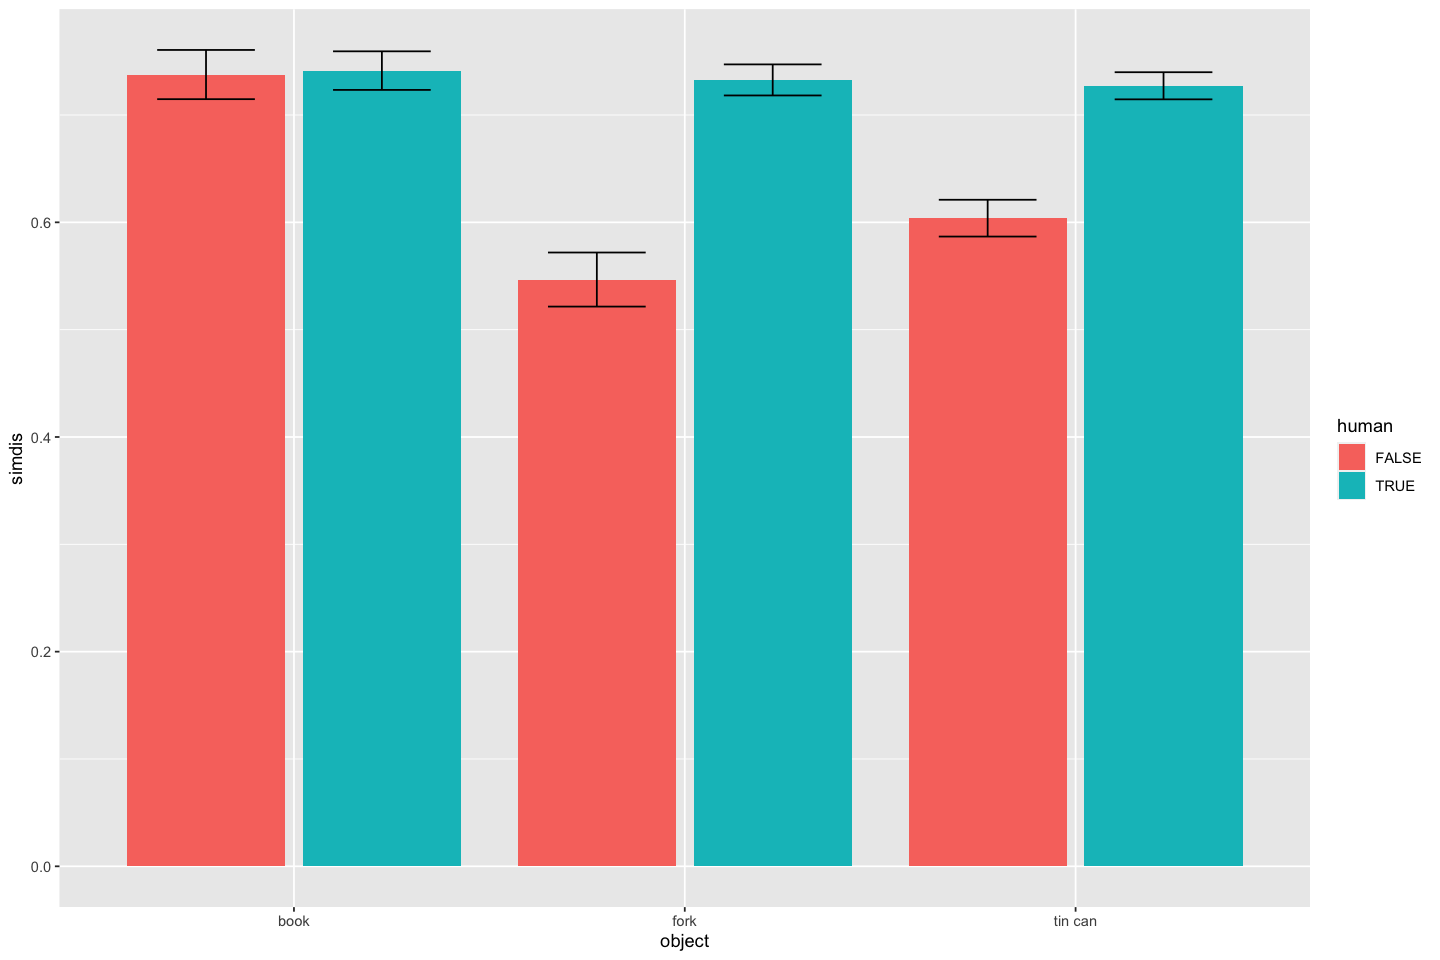

In [147]:
options(repr.plot.width=12, repr.plot.height=8)
dat2 %>% group_by(object,human) %>% 
    summarise(simdis = mean(cos_dist_objc_resp), se=sd(cos_dist_objc_resp)/n()^0.5) %>% 
    ggplot(aes(object, simdis, fill=human)) + geom_bar(stat = "identity", position = "dodge2") +
    geom_errorbar(aes(ymin= simdis-1.96*se, ymax=simdis+1.96*se), width=.5, position=position_dodge(.9))

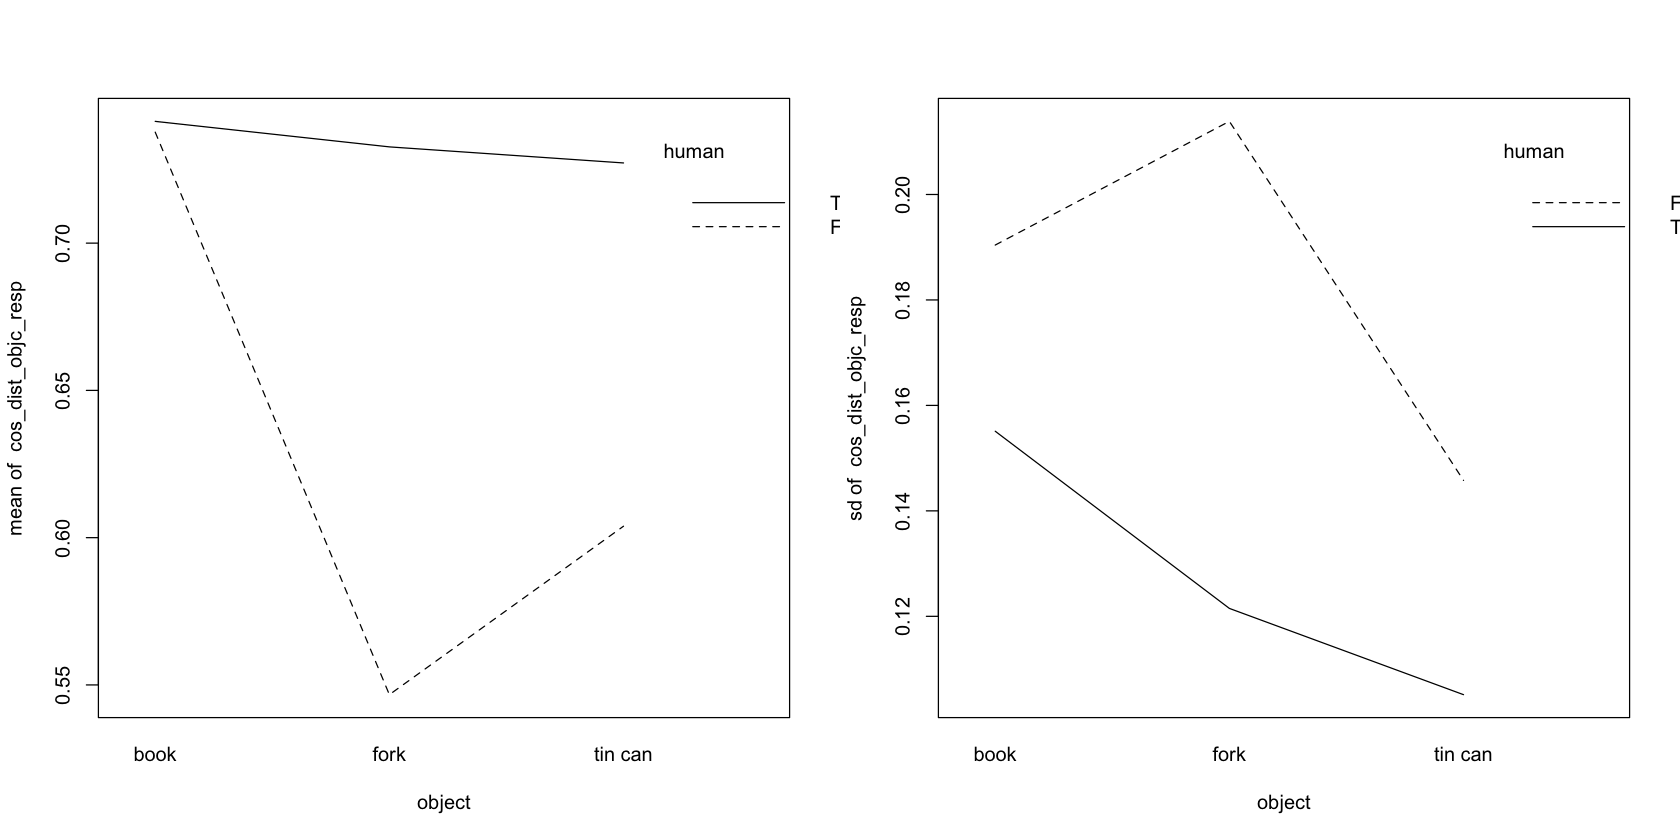

In [148]:
options(repr.plot.width=14, repr.plot.height=7)
layout(t(1:2))
with(dat2, interaction.plot(object, trace.factor = human, response = cos_dist_objc_resp, fun = mean))
with(dat2, interaction.plot(object, trace.factor = human, response = cos_dist_objc_resp, fun = sd))

### Diagnostics

To see if the assumptions for ANOVA hold we look at plots. A simple box and whisker plot reveals no gross violations of homogeneity of cell variances:

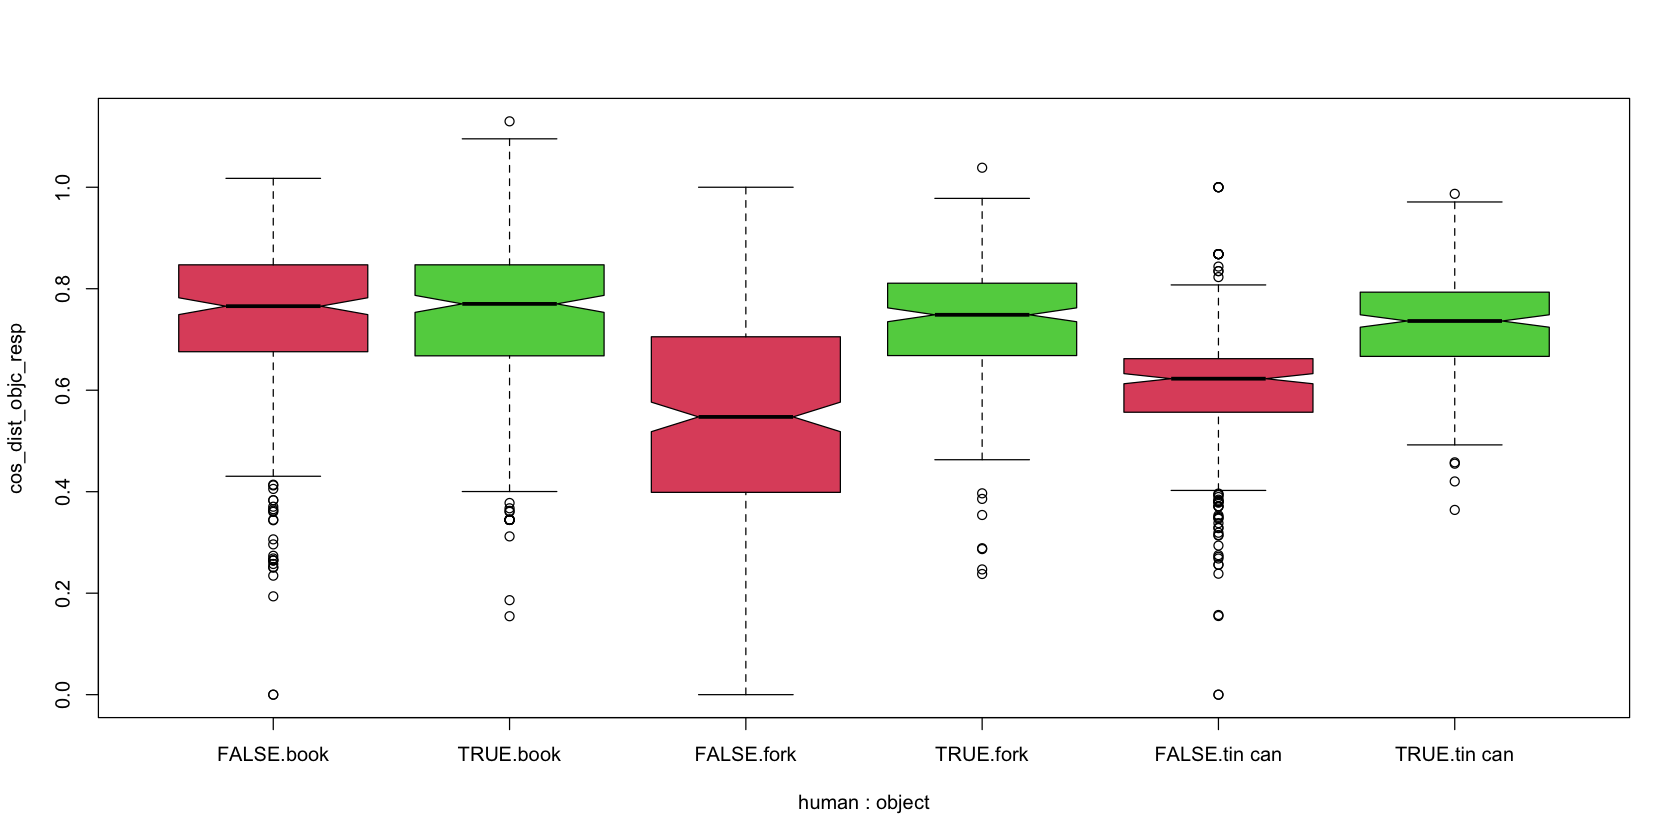

In [149]:
boxplot(cos_dist_objc_resp ~ human*object, data=dat2,  col=2:3, notch=T)
#dat2 %>% ggplot(aes(cos_dist_objc_resp, fill=interaction(human,object))) + geom_density(alpha=0.3) # not so interesting

Levene's test below indicates that variances are different, which would be a violation of the assumption of homogeneity of variances. We must take into consideration however that a) the observations are not independent (something that cannot be handled by Levene's test), plus b) this may also indicate non-normal error distributions. Furthermore, the amount of data is so large that the central limit most likely kicks in, rendering the analysis of variance output is probably still valid.

In [150]:
car::leveneTest(aov(cos_dist_objc_resp ~ object*human, data = dat2))

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,33.95128,4.369528e-33
,1637,NA,NA


## Subanalysis of AI generated responses

It is of interest to see if the AI generated responses vary with `temperature`. We should expect this, because the higher the temperature parameter in GPT-3 the more random (non-repeatable) the responses are—or rather, _should be_.

Because `temperature` and `respondent_id` are collinear, we first average the semantic distance within `respondent_id` and then run a plain regression.



Call: lm(formula = cos_dist_objc_resp ~ temperature, data = tmp)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.77021    0.08466   9.097   <2e-16 ***
temperature -0.19678    0.11675  -1.686   0.0923 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard deviation: 0.1557 on 818 degrees of freedom
Multiple R-squared: 0.003461
F-statistic: 2.841 on 1 and 818 DF,  p-value: 0.09227 
    AIC     BIC 
-719.21 -705.08 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



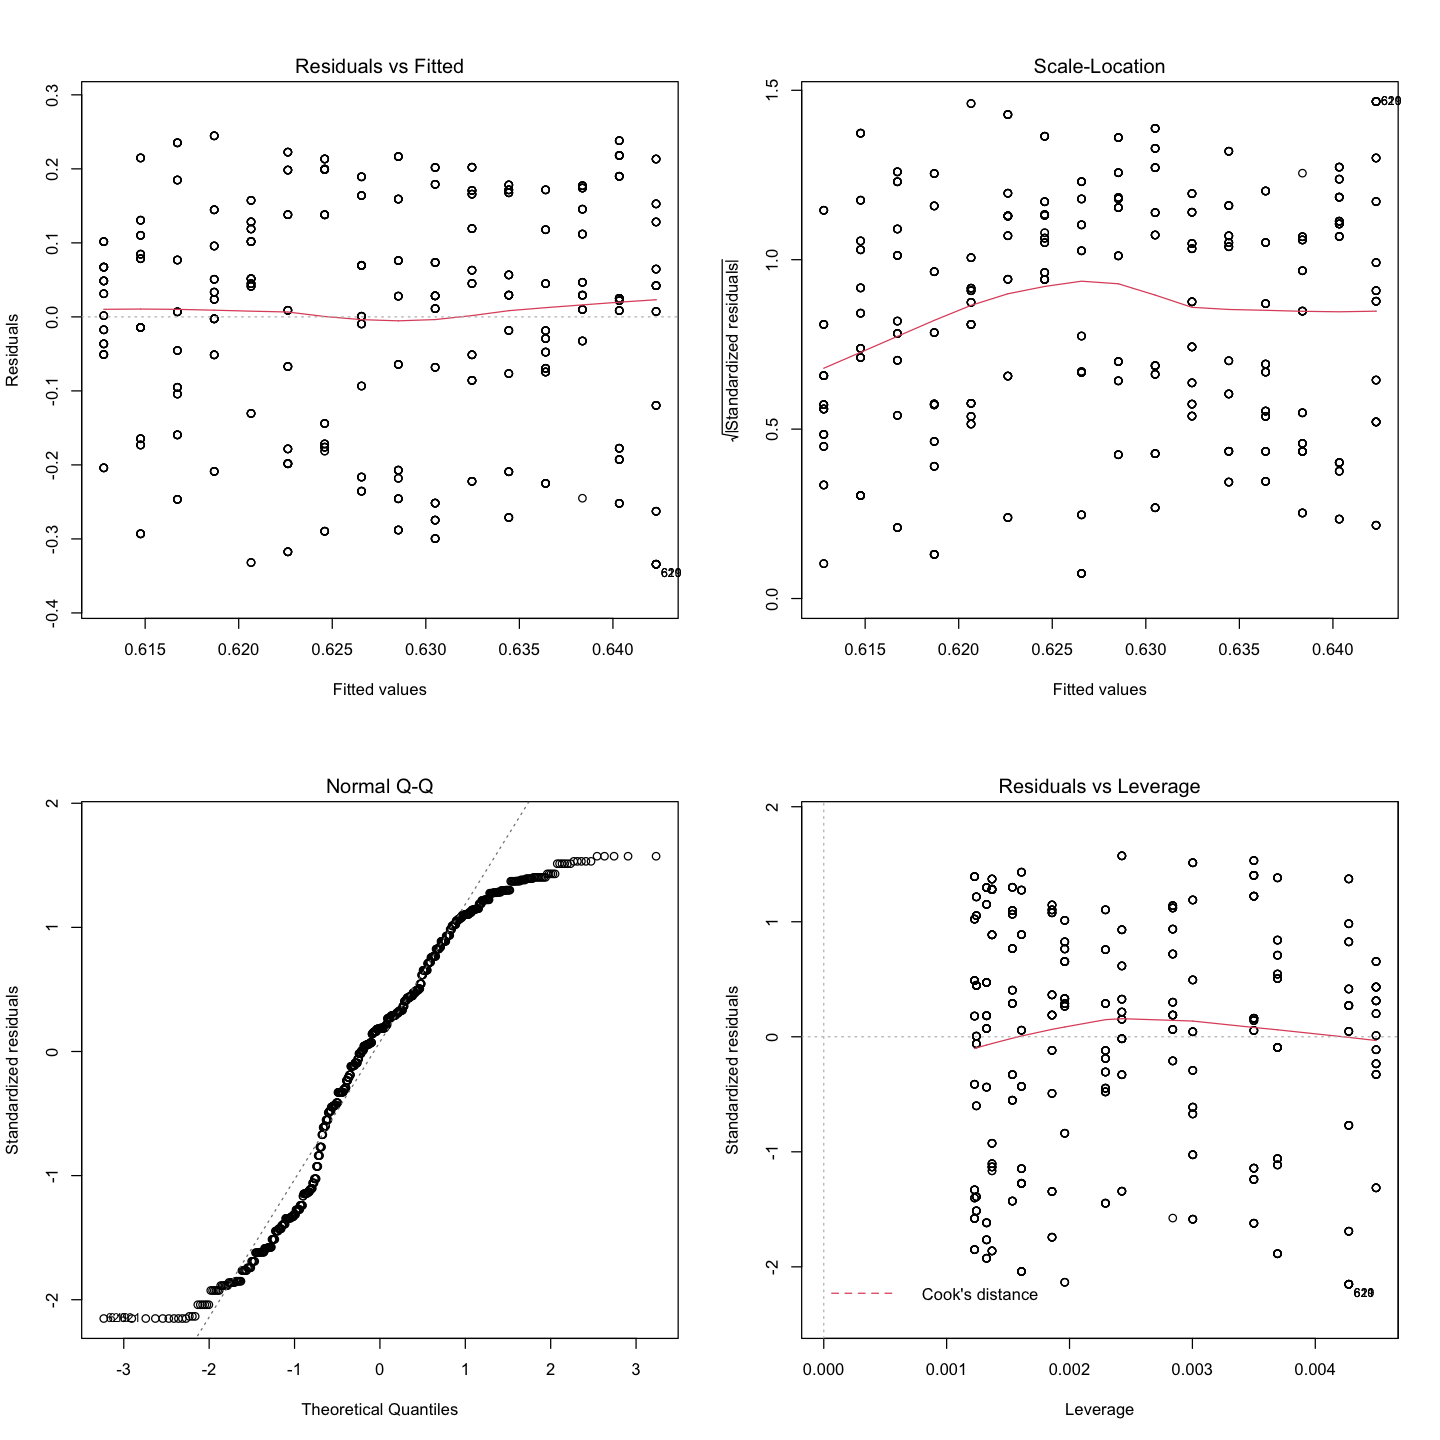

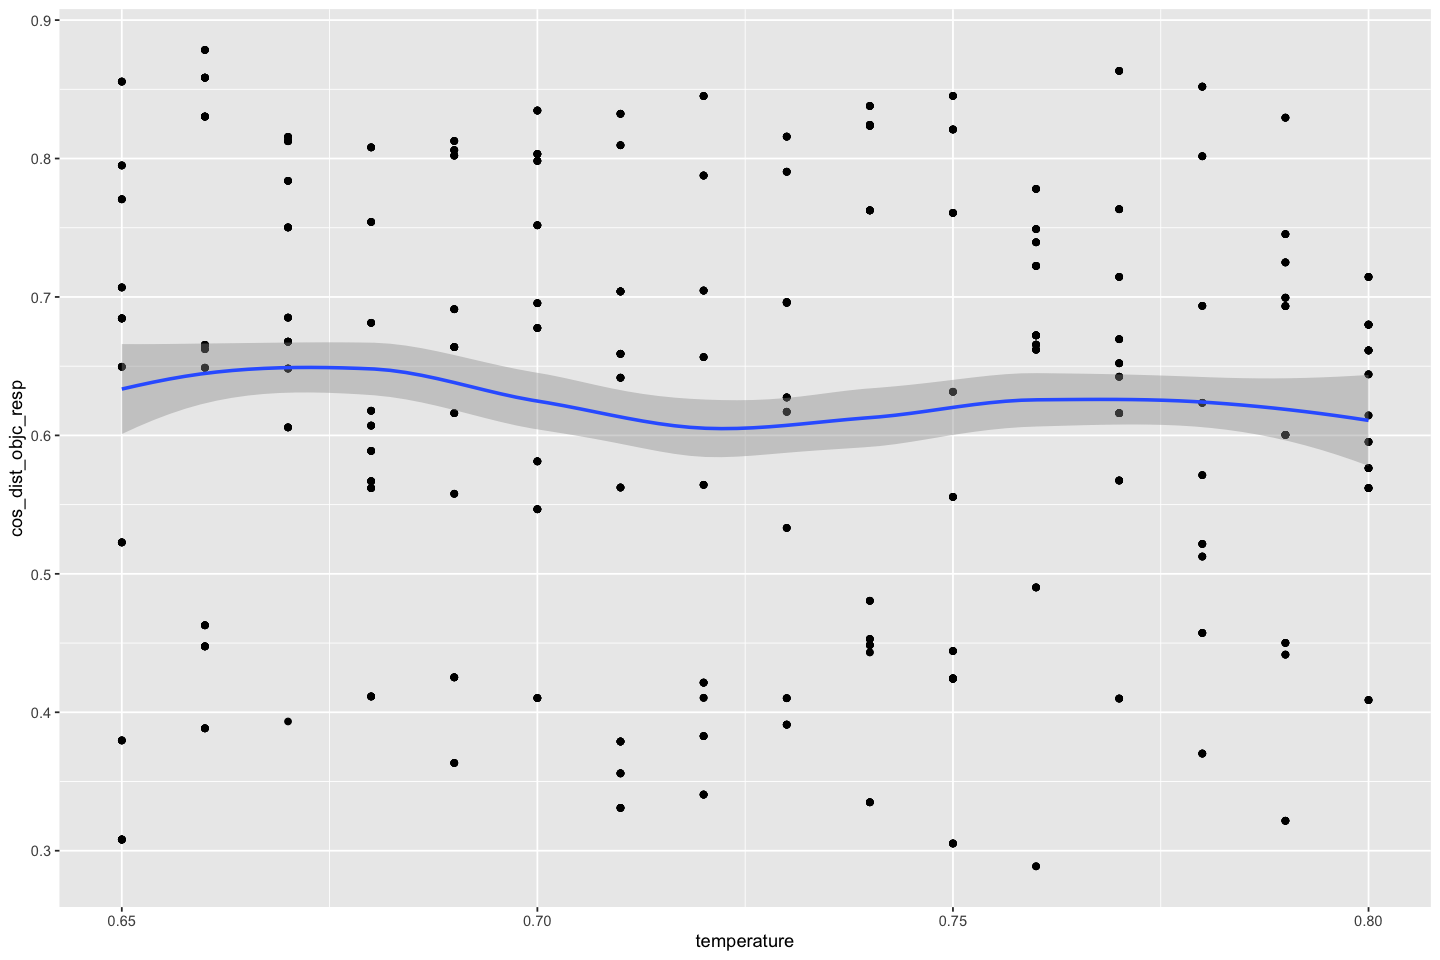

In [151]:
tmp = dat2 %>% filter(!human) %>% group_by(respondent_id) %>% mutate(cos_dist_objc_resp= mean(cos_dist_objc_resp))
fit_lm_temp = lm(cos_dist_objc_resp ~ temperature, data=tmp)
car::S(fit_lm_temp)

options(repr.plot.width=12, repr.plot.height=12)
layout(matrix(1:4,2))
plot(fit_lm_temp)
layout(1)
options(repr.plot.width=12, repr.plot.height=8)
tmp %>% ggplot(aes(temperature, cos_dist_objc_resp)) + geom_point() + geom_smooth()

## Foraging hypothesis analysis

The foraging hypothesis analysis holds that respondents on the AUT search there memory using a depth first approach: They find a first example and then find more examples within the same category. Once the category is depleted (or the rate at which new items from the same category come to mind slows down below a threshold), they switch to a new category (e.g., by means of moving attention towards other features of the last generated response). This implies that the semantic distance between subsequent responses fall into two groups: A group of within category responses (presumably having lower semantic distances) and a group of between category responses (presumably having higher semantic distances). To find evidence for this we computed the semantic distances between subsequent responses of each respondent to an object (veriable `semdis_prev`). The two groups should show up as a bimodal distribution of the semantic distances. Since switches between categories are less frequent than responses within category, we expect a high peak around an average of lower sequential semantic distances, and a much smaller peak around an average of higher sequential distances. A questions is if GPT3 'searches memory' in the same way as humans when instructed to do the AUT. 

The bimodal distribution does not clearly materialize in the density plots below: First  the sequential semantic distances were standardized _within respondent and object_, then density plots were generated in two ways:

- the first plot shows for each respondent a density curve is plotted for each object, 
- the second plot shows a density estimate for each object, aggregated across respondents.

This is done separately for both human respondents and GPT-3. While not for each respondent, for many respondents there is a clear bimodal pattern. For GPT-3 on the other hand, there is no evidence for bimodality.

Warning message:
“Removed 3 rows containing non-finite values (stat_density).”


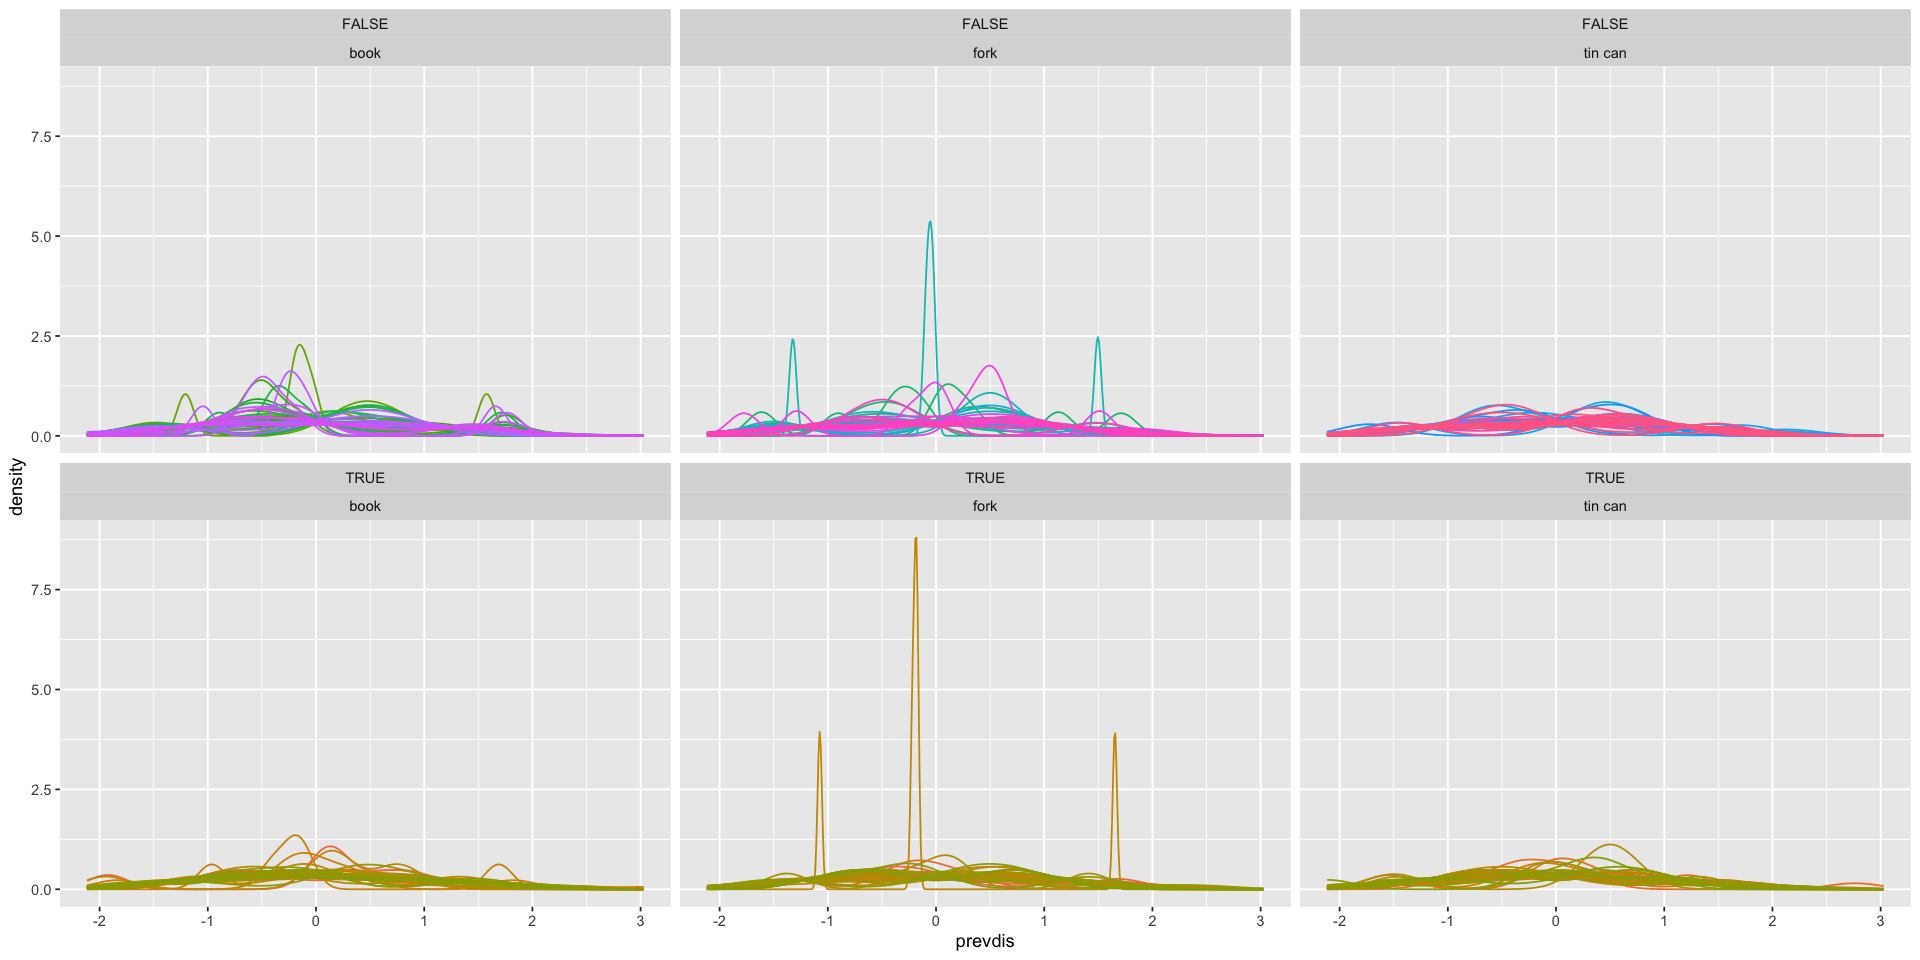

In [161]:
options(repr.plot.width=16, repr.plot.height=8)
dat2 %>% 
    group_by(respondent_id, object)  %>% 
    arrange(response_id, object) %>%
    filter(n() > 1, semdis_prev < 2) %>%
    mutate(prevdis = (semdis_prev-mean(semdis_prev)) / sd(semdis_prev)) %>%
    ggplot(aes(prevdis, group=respondent_id, col=respondent_id)) + 
        geom_density(show.legend = F, bw='nrd0') + 
        facet_wrap(~human+object)

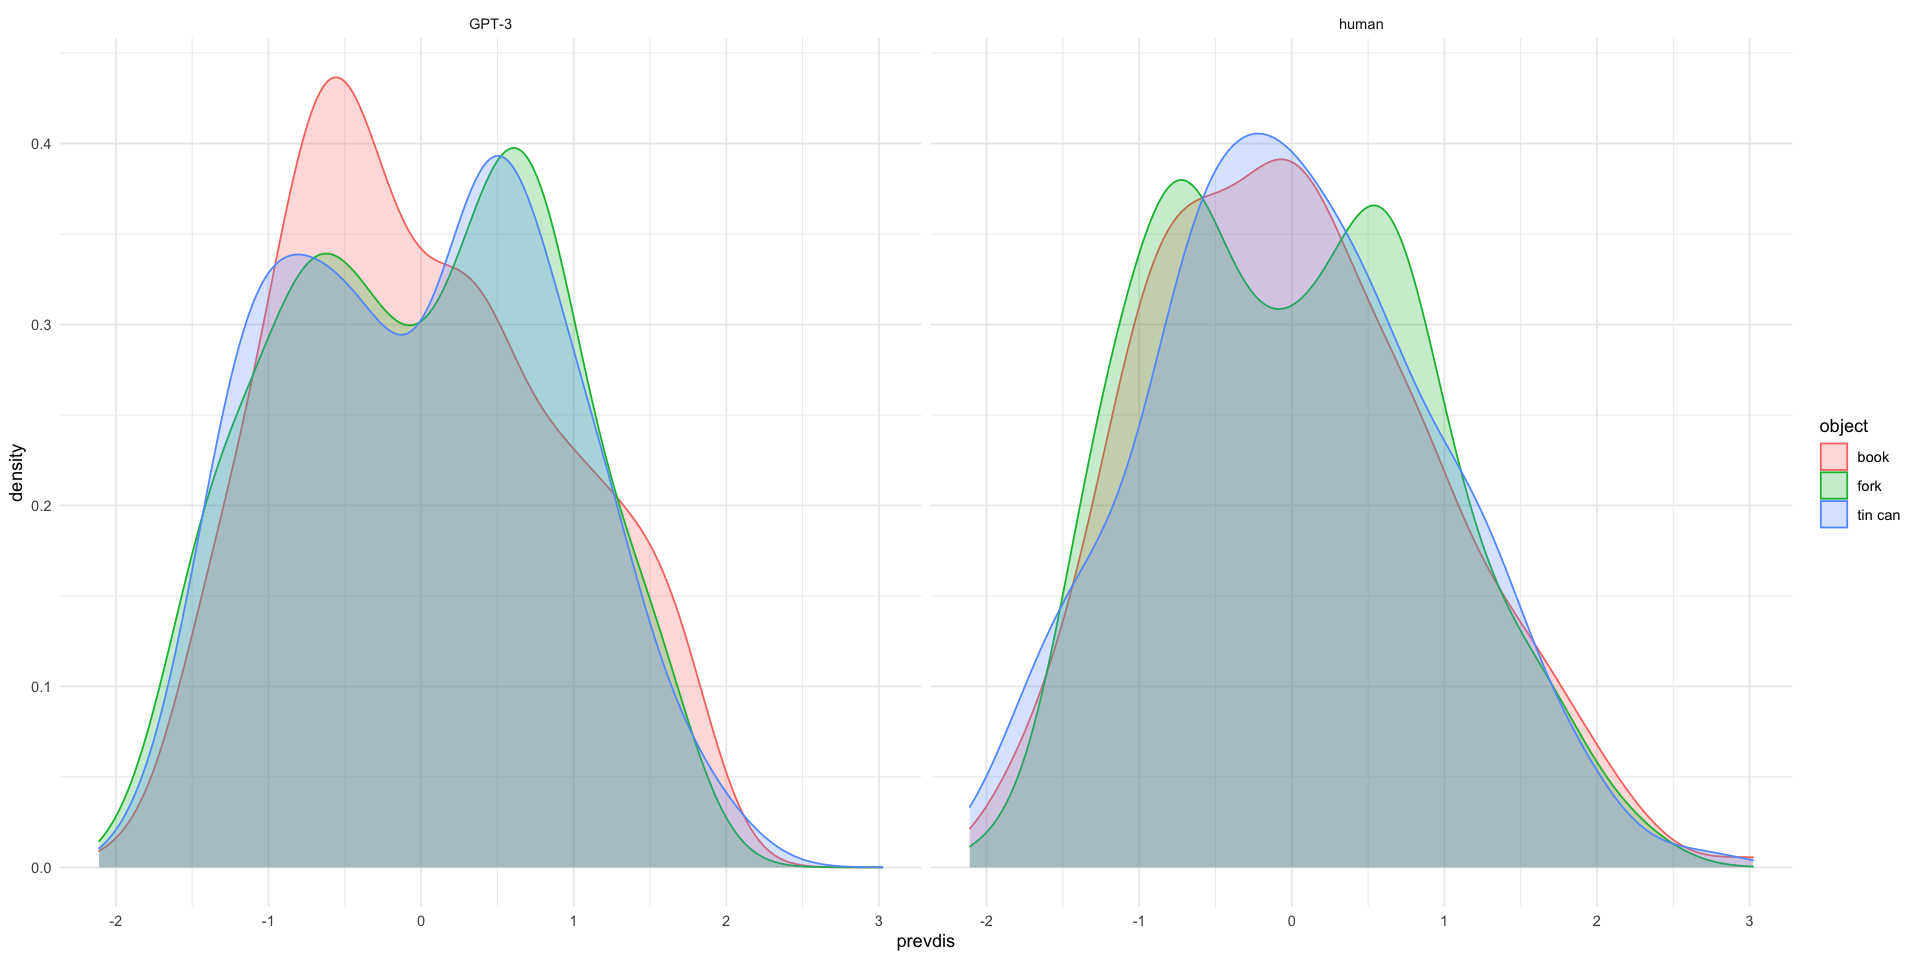

In [164]:
dat2 %>% 
    mutate(human = ifelse(human, "human", "GPT-3")) %>%
    filter(semdis_prev < 2) %>%
    group_by(respondent_id, object)  %>% 
    arrange(response_id, object) %>%
    filter(n() > 1) %>%
    mutate(prevdis = (semdis_prev-mean(semdis_prev)) / sd(semdis_prev)) %>%
    ggplot(aes(prevdis, col=object, fill=object)) + 
        geom_density(show.legend = T, alpha=0.25) + 
        facet_wrap(~human) + theme_minimal()

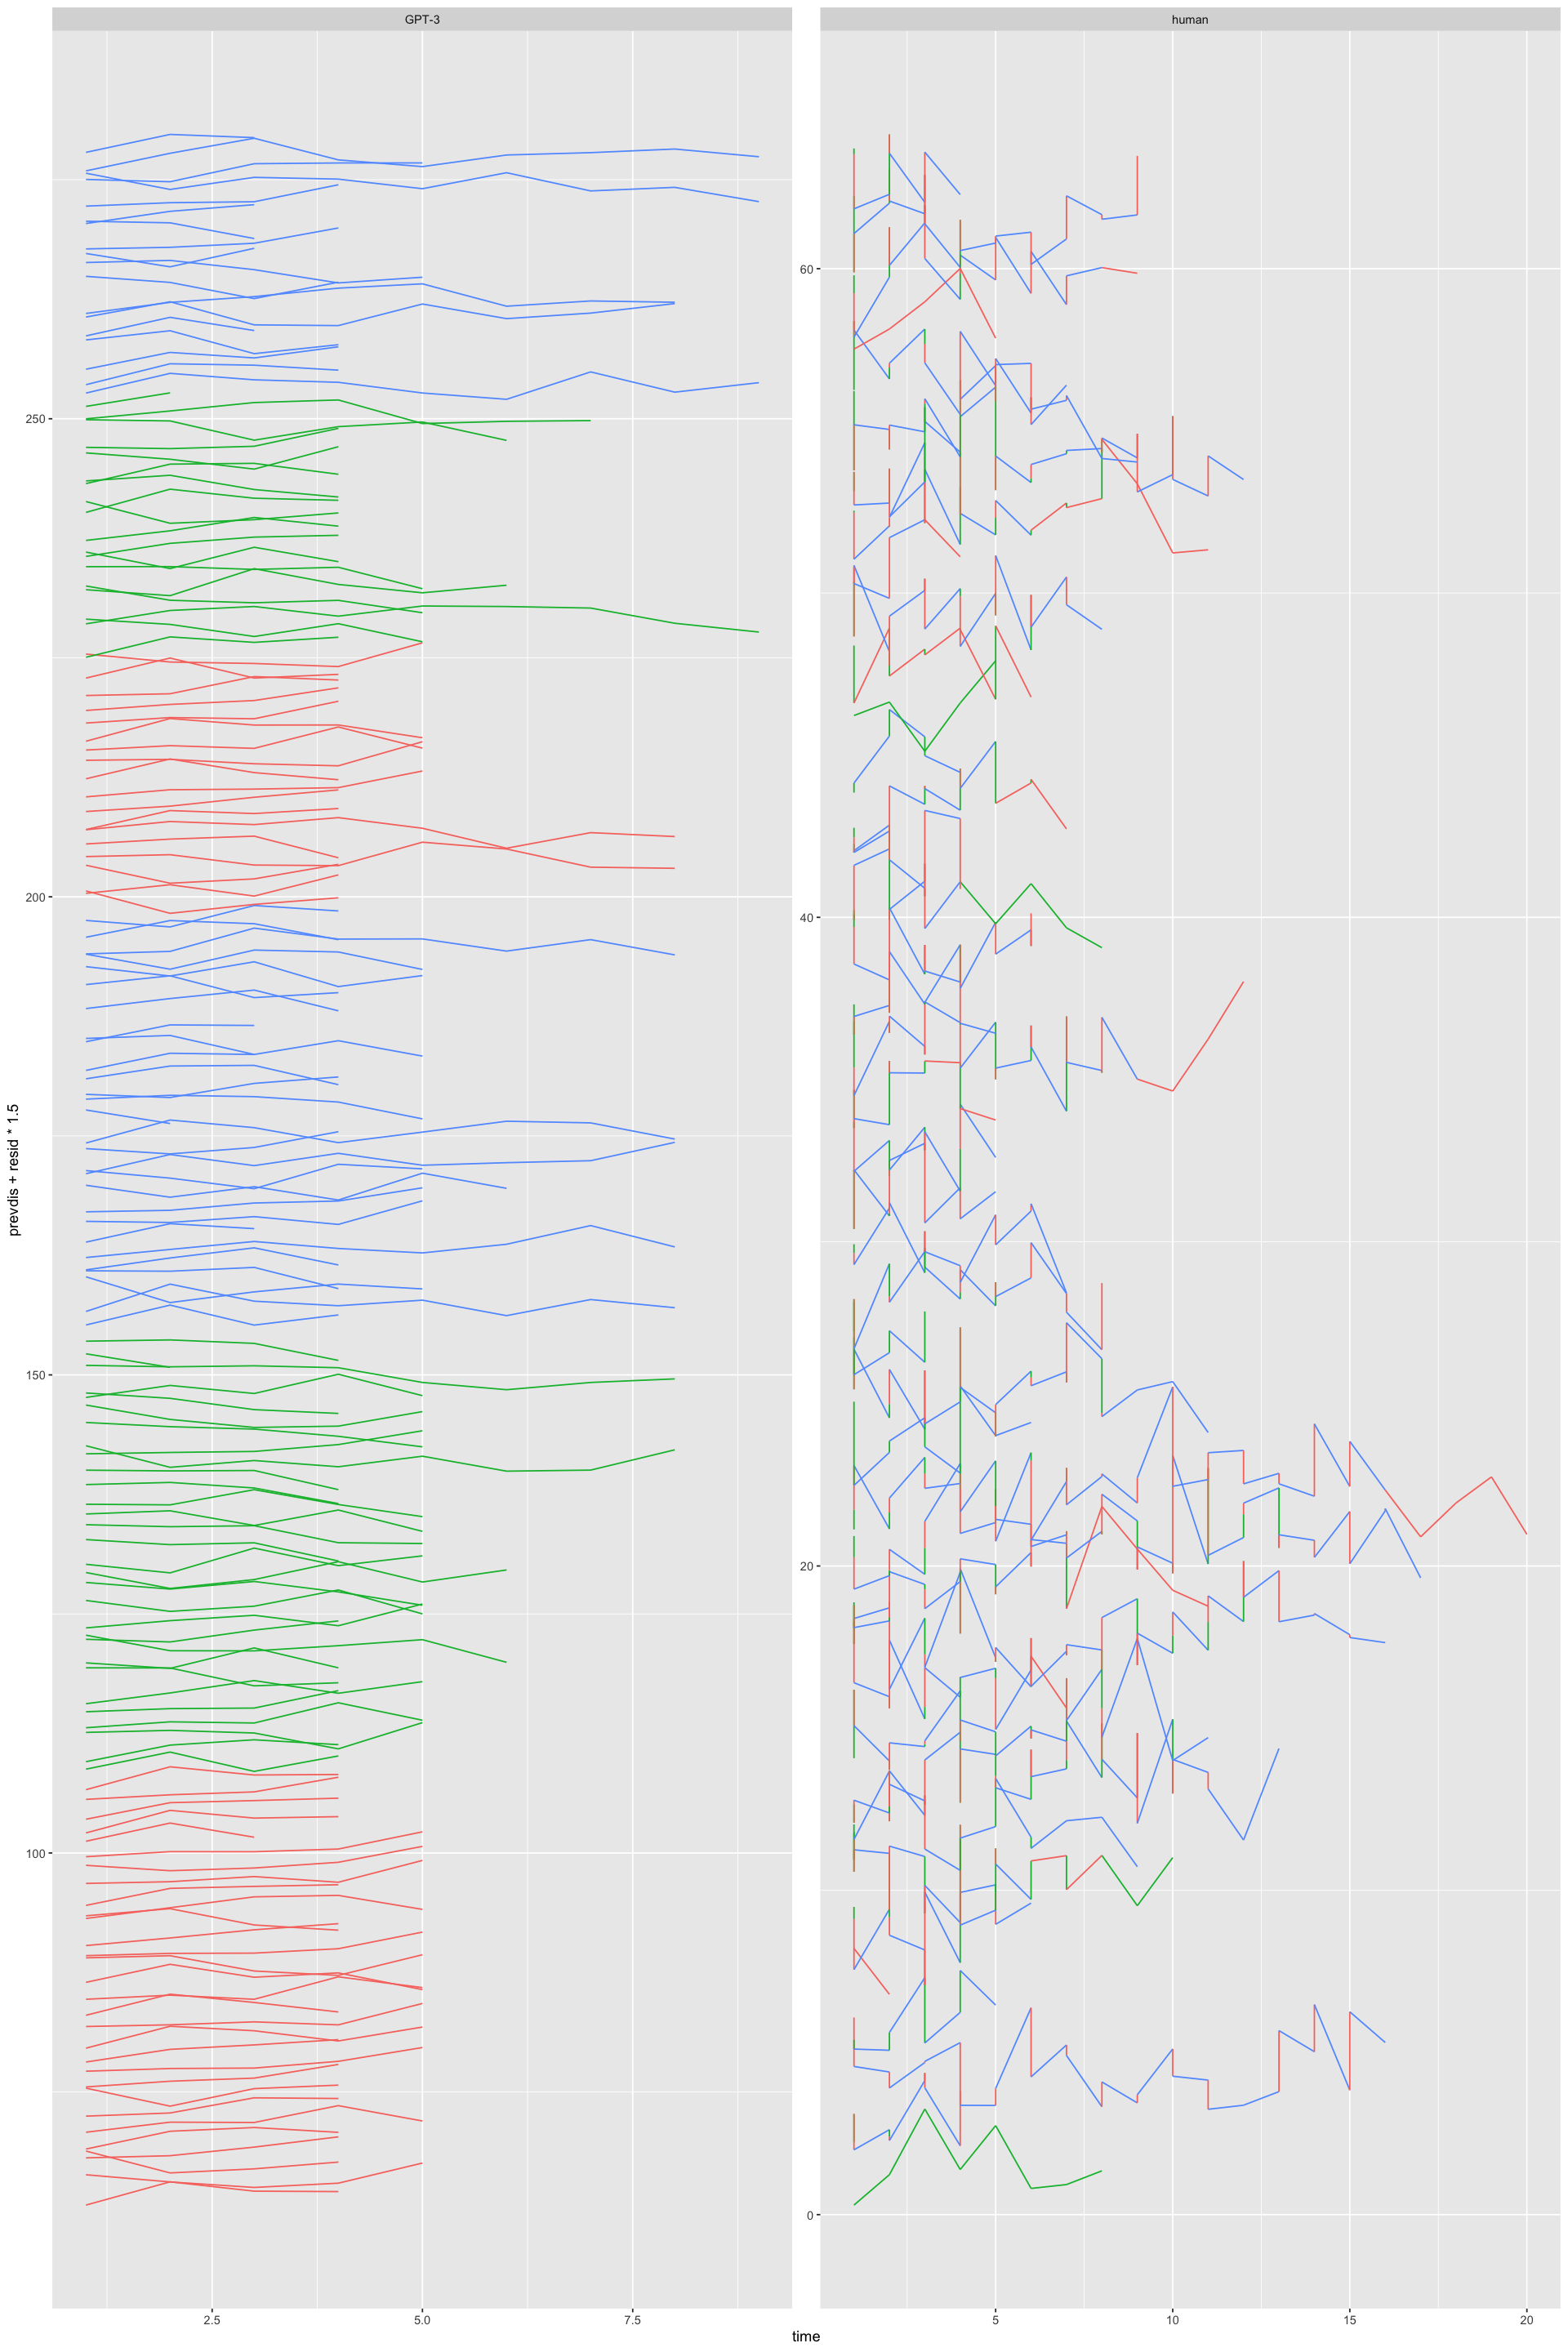

In [177]:
options(repr.plot.height=24)
dat2 %>% 
    mutate(human = ifelse(human, "human", "GPT-3"),resid=as.numeric(factor(respondent_id))) %>%
    filter(semdis_prev < 2) %>%
    arrange(response_id, object) %>%
    group_by(respondent_id, object)  %>% 
    mutate(time = 1:n()) %>%
    filter(n() > 1) %>%
    mutate(prevdis = (semdis_prev-mean(semdis_prev)) / sd(semdis_prev)) %>%
    ggplot(aes(time, prevdis+resid*1.5, group=respondent_id, col=object)) + geom_line(show.legend=F) + facet_wrap(~human, scales = "free")

In [ ]:
dat